# Toolbox Template Expansion as a Service - Workflow


### Workflow Template and Binding Document

#### NOTE!! provenance template server under migration, the notebook will be updated with a new enpoint asap

The cell below shows the example of a JSON binding document, *workflow_binding*, used to expand the PROV-Template that models the general execution information a Toolbox workflow. The binding examplifies an execution of the **Calculate Trends** workflows that is parametrised with *Europe* (***parval***) as the *Region* (**parkey**) of interest for the analysis. 

The variable *tool_binding* instead exmplifies the lineage information associated to the execution of the *monthly_mean*, being this tool part of the **Calculate Trends** workflow.

The templates are avalable at the following addresses for consultation.

worklfow execution
https://openprovenance.org/store/documents/1058

single tool lineage
https://openprovenance.org/store/documents/1059

### Software Requirements

The following python and prov modules are used by this notebook

*python = 3.7.2*

*prov = 1.5.1*

The remote Provenance Template Catalogue can be downloaded and installed through Docker, as explained here

https://github.com/EnvriPlus-PROV/ProvTemplateCatalog#setup-using-docker


### Local Expansion With ProvToolbox

The bindings presented in this notebook can be expanded also by using the ProvToolbox

https://lucmoreau.github.io/ProvToolbox/

Command line execution example:

```
provconvert -infile template.provn  -bindings binding.json  -outfile doc.json -bindver 3

```

In [10]:

workflow_binding="""

   {
  "var" : {
   "WFExecution":[{"@id":"uuid:wfrun00001"}],
   "toolbox":[{"@id":"uuid:C3SToolBox0001"}],
   "Workflow":[{"@id":"uuid:Workflow0001"}],
   "wfname":["Calculate Trends"],
   "wftype":["c3s:Trend"],
   "parval": ["Europe"],
   "parameter":[{"@id":"uuid:wfpar0001"}],
   "parkey":["Region"],
   "accessUrlOut":["https://cds.data/91991343"],
   "accessUrlInp":["https://cds.data/9199194"],
   "version":["v0.5"],
   "wfversion":["v0.8"],
   "pid": ["52556"],
   "cresource":[{"@id":"uuid:DIAS_BCN"}],
   "worker": ["node4c3s"],
   "accessUrlDocumentation":["https://cds.climate.copernicus.eu/toolbox-editor/examples/31-calculate-trends"],
   "user":[{"@id": "http://orcid.org/0000-0002-3494-120X"}],
   "lib": [{"@id": "uuid:cdstoolbox10"}],
   "libname": ["cdstoolbox"],
   "libversion": ["v1.0"],
   "wfstart": ["2019-06-07T15:58:58Z"],
   "startedAt":["2019-06-07T15:51:58Z"],
   "generatedAt":["2019-06-07T15:58:58Z"]
  },
  "context" : {
  
      "prov": "http://www.w3.org/ns/prov#",
    "xsd": "http://www.w3.org/2001/XMLSchema#" ,
    "tmpl": "http://openprovenance.org/tmpl#" ,
    "var": "http://openprovenance.org/var#" ,
    "ex": "http://example.com/#" ,
    "mc": "http://www.metaclip.org/datasource/datasource.owl#",
    "http": "http:",
    "c3s": "http://www.c3s.org/#",
    
    
     "uuid": "urn:uuid:",
     "https": "https:"
   }
 }

"""


monthly_mean_binding="""
 {

  "var" : {
   "derivtype": ["c3s:Mean"],
   "toolbox":[{"@id":"uuid:C3SToolBox0001"}],
   "parval": ["23","True"],
   "WFexecution":["uuid:wfrun00001"],
   "parameter":[{"@id":"uuid:par0001"},{"@id":"uuid:par0002"}],
   "parkey":["baseint","keep_attrsbool"],
   "input": [{"@id":"uuid:91991554"}],
   "accessUrlOut":["https://cds.data/91991343"],
   "accessUrlInp":["https://cds.data/9199194"],
   "version":["v0.5"],
   "pid": ["12345"],
   "cresource":[{"@id":"uuid:DIAS_BCN"}],
   "worker": ["node6c3s"],
   "accessUrlDocumentation":["https://git.ecmwf.int/projects/CST/repos/cdstools/commits/7f4d184cf8f0638cedd4039a4293b8afb674f392#cdstools/season.py"],
   "user":[{"@id": "http://orcid.org/0000-0002-3494-120X"}],
   "tool": [{"@id":"uuid:monyhly_trend0001"}],
   "lib": [{"@id":"uuid:numpy10"},{"@id":"uuid:xarray20"}],
   "libname": ["numpy","xarray"],
   "libversion": ["v1.0","v2.0"],
   "executionStartTime": ["2019-06-07T15:58:58Z"],
   "executionEndTime":["2019-06-07T16:58:58Z"],
   "startedAt":["2019-06-07T15:51:58Z"],
   "generatedAt":["2019-06-07T15:58:58Z"]
  },
  "context" : {
  
     "prov": "http://www.w3.org/ns/prov#",
     "xsd": "http://www.w3.org/2001/XMLSchema#",
     "tmpl": "http://openprovenance.org/tmpl#",
     "var": "http://openprovenance.org/var#",
     "c3s": "http://linktovoc.org/#",
     "uuid": "urn:uuid:",
     "http": "http:" 
     

  }
}
"""

### Execution of the Expansion as a service

The template is stored in a test instance of the Proveance Template Catalog Service, deployed on AWS. The service enables its management and expansion. 

The script below refers to the templates' ids *workflow_template_id* and *tool_template_id* and uses the expansion service indicated by the variable *host_name*.

The Provenance Catalgue's expansion service is invoked through a POST request.

In [11]:
import requests
from urllib.parse import urlencode, quote_plus


host_name = 'swirrl.climate4impact.eu/prov-template-catalog'
workflow_template_id = '5e3aa3b53b832a1247611a00'
tool_template_id = '5e3aa1e23b832a12476119ff'


workflow = requests.post('https://' + host_name + '/api/templates/' + workflow_template_id + 
    '/expand?fmt=provjson&writeprov=false&bindver=v3',
        data=workflow_binding, verify=False)


monthly_mean = requests.post('https://' + host_name + '/api/templates/' + tool_template_id + 
    '/expand?fmt=provjson&writeprov=false&bindver=v3',
        data=monthly_mean_binding, verify=False)

print(workflow.text)

print(monthly_mean.text)

/Users/aspinuso2/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swirrl.climate4impact.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/aspinuso2/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swirrl.climate4impact.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


{"prefix": {"mc": "http://www.metaclip.org/datasource/datasource.owl#", "ex": "http://example.com/#", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "rdfs": "http://www.w3.org/2000/01/rdf-schema#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/s-prov-o.owl", "c3s": "http://linktovoc.org/#", "tmpl": "http://openprovenance.org/tmpl#", "var": "http://openprovenance.org/var#", "vcard": "http://www.w3.org/2006/vcard/ns#", "xml": "http://www.w3.org/XML/1998/namespace", "http": "http:", "uuid": "urn:uuid:", "vargen": "http://openprovenance.org/vargen#", "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#", "https": "https:", "c3s_1": "http://www.c3s.org/#"}, "bundle": {"uuid:ToolboxWorkflowExecution": {"prefix": {"c3s": "http://linktovoc.org/#", "uuid": "urn:uuid:", "http": "http:", "vcard": "http://www.w3.org/2006/vcard/ns#", "var": "http://openprovenance.org/var#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/s-pro

### Visualisation

Thanks to the https://pypi.org/project/prov/ module the single documents can be visualised as follows.

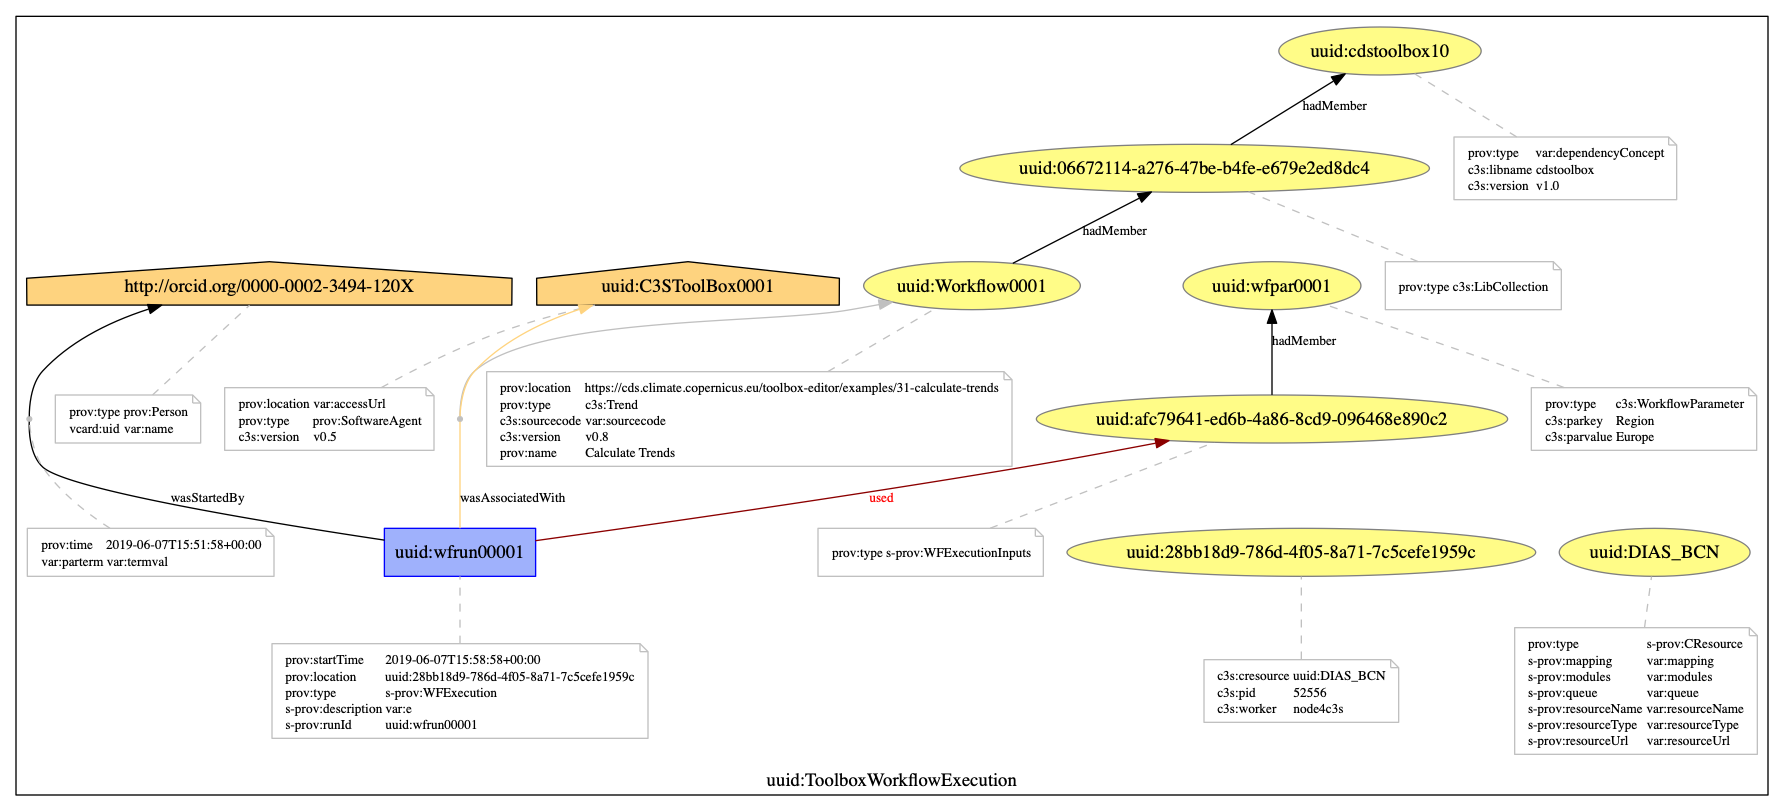

In [7]:
from prov.serializers.provjson import ProvJSONSerializer
from IPython.display import Image
import io
from prov.model import ProvDocument, ProvBundle, ProvException, first, Literal
from prov.dot import prov_to_dot

def provJSONtoPNG(doc,format):
     
    
    doc=ProvJSONSerializer.deserialize(ProvJSONSerializer,doc)
    dot = prov_to_dot(doc)
    
    if format=="png":
        dot.write_png('PROV.png')
        return 'PROV.png' 
    if format=="svg":
        dot.write_svg('PROV.svg')
        return 'PROV.svg'
    
    

w = io.StringIO(workflow.text)
png_content=provJSONtoPNG(w,"png")


 

Image(png_content)
 

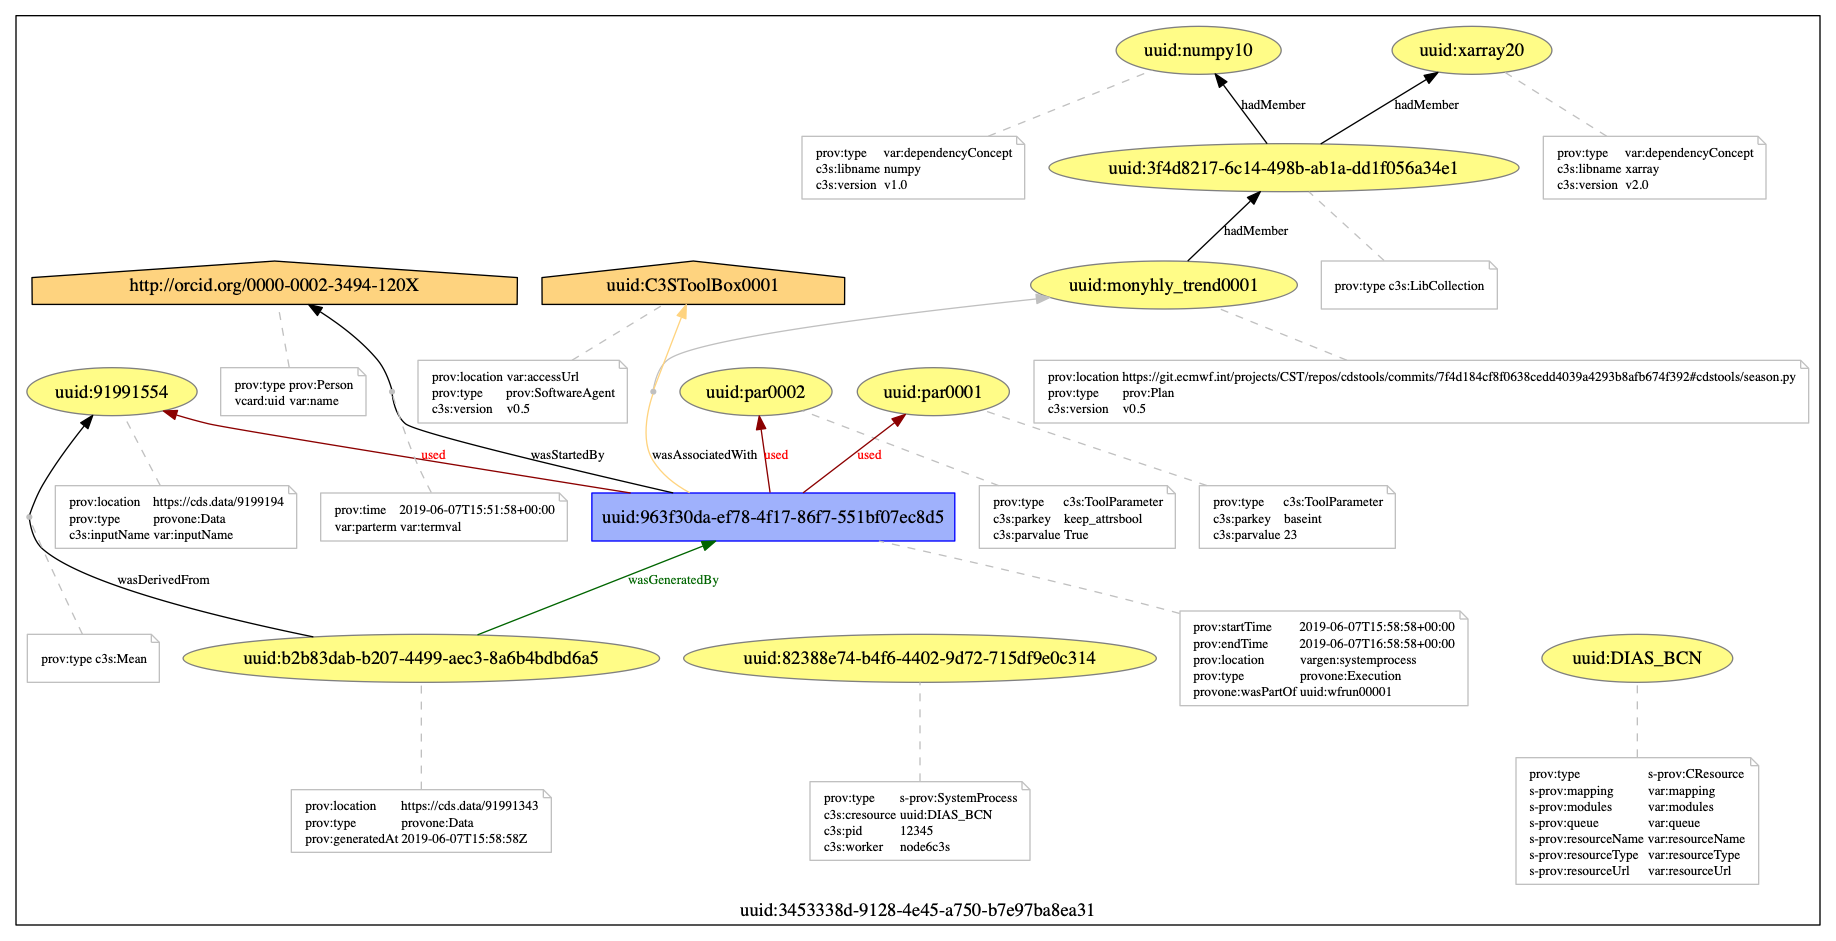

In [8]:
t = io.StringIO(monthly_mean.text)
png_content=provJSONtoPNG(t,"png")

Image(png_content)

### Merging in a single view

The two single documents can be merged into one, where all the entities are connected in a comprehensive view.

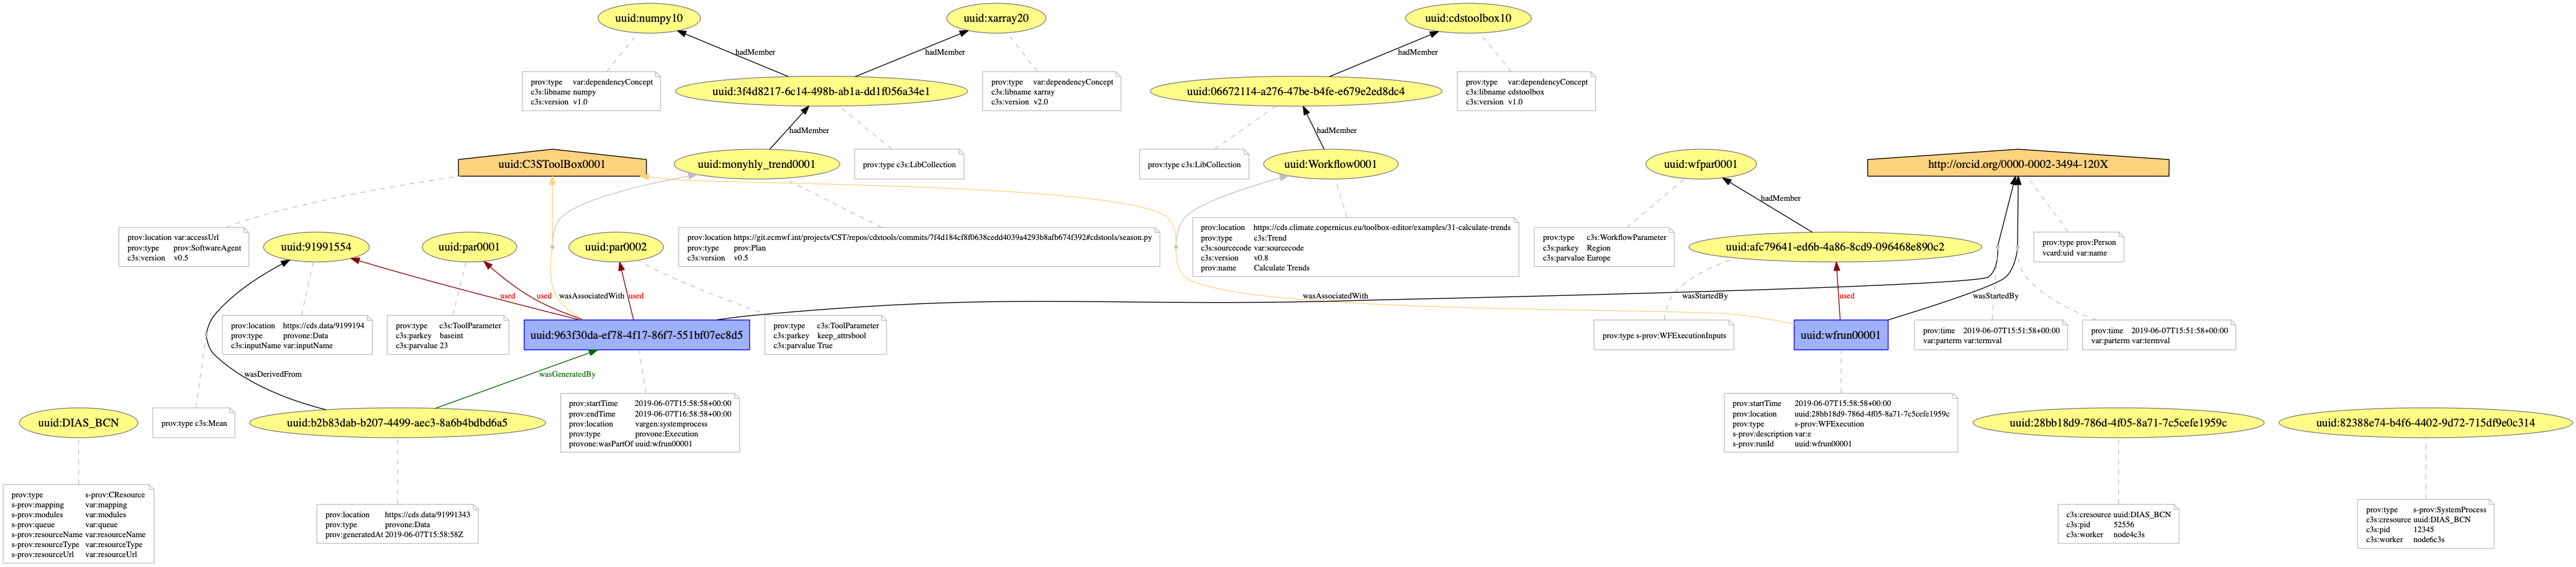

In [9]:


doc_tool=ProvJSONSerializer.deserialize(ProvJSONSerializer,io.StringIO(monthly_mean.text))
doc_workflow=ProvJSONSerializer.deserialize(ProvJSONSerializer,io.StringIO(workflow.text))
doc_workflow.add_bundle(list(doc_tool.bundles)[0])

png_content=provJSONtoPNG(io.StringIO(doc_workflow.flattened().serialize()),"png")

Image(png_content)